# Титаник
В этом задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic>ссылке</a>.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
X = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv', index_col='PassengerId')

#Если запускаете ноутбук локально:
#data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
basic_features = X.columns

y = pd.read_csv('/content/gdrive/My Drive/titanic_surv.csv')
y.index = X.index

print(f'Всего {len(X)} пассажиров в выборке')
X.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [ ]:
data = X.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы.
Проведите схожую аналитику по возрасту выживших и по классу выживших.

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a>

In [ ]:
man = data.loc[data.Sex == 'male']["Survived"]
rate_man = sum(man)/len(man)
print("всего мужчин:", len(man))

women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("всего женщин:", len(women))
print("распределение по классам пассажиров:")

print(data['Pclass'].value_counts(normalize=True).sort_index(ascending=True))

print("доля выживших мужчин:", rate_man)

print("доля выживших женщин:", rate_women)


всего мужчин: 577
всего женщин: 314
распределение по классам пассажиров:
1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64
доля выживших мужчин: 0.18890814558058924
доля выживших женщин: 0.7420382165605095


Гистаграмма выживших по возрасту

Text(0.5, 1.0, 'Гистаграмма выживших по возрасту')

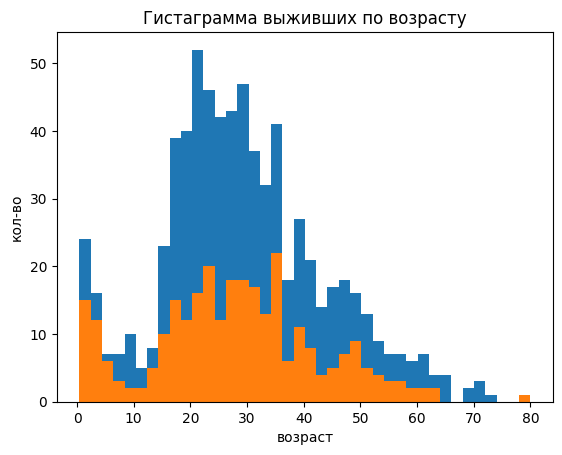

In [ ]:
plt.hist(data['Age'], 40)
plt.hist(data['Age'][data.Survived == 1], 40)

plt.xlabel('возраст')
plt.ylabel('кол-во')
plt.title('Гистаграмма выживших по возрасту')

(1.0, 3.0)

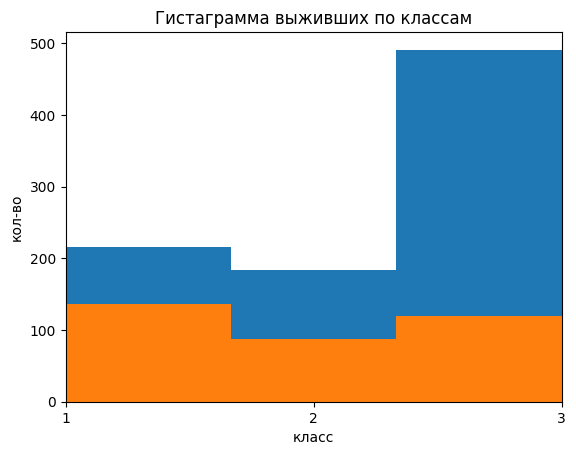

In [ ]:
plt.hist(data['Pclass'],3)
plt.hist(data['Pclass'][data.Survived == 1],3)

plt.xticks([1, 2, 3])
plt.xlabel('класс')
plt.ylabel('кол-во')
plt.title('Гистаграмма выживших по классам')
plt.xlim(1, 3)

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках:

In [ ]:
X.columns[X.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением.

In [ ]:
X.loc[:, ['Cabin', 'Embarked']] = X.loc[:, ['Cabin', 'Embarked']].fillna('0')
X['Age'] = X['Age'].fillna(X['Age'].median())

## Подготовка плана тестирования

### Задание 2.
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [ ]:
y = data['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
651,3,"Mitkoff, Mr. Mito",male,28.0,0,0,349221,7.8958,0,S
173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,0,S
451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,0,S
315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,0,S
...,...,...,...,...,...,...,...,...,...,...
107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,0,S
271,1,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,0,S
861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,0,S


## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас.

Указания:
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [ ]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S


In [ ]:
X['Cabin'].head()

PassengerId
1       0
2     C85
3       0
4    C123
5       0
Name: Cabin, dtype: object

In [ ]:
def get_cabin_letter(row):
    return row['Cabin'][0]

X['cabin_type'] = X.apply(get_cabin_letter, axis=1)

Сюда добавьте описание вашего нового признака

In [ ]:
def is_boy(row): #мой новый признак - соответствие критерия "мальчик", у мужчин шанс выжить меньше но то что они дети может сильно повлиять
    return row['Age']<18 and row['Sex'] == 'male'

X['is_boy'] = X.apply(is_boy, axis=1)
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_type,is_boy
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,False
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,False
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,False
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,False
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,False
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,False
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,False


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные.

In [ ]:
X.drop(columns = ['Name','Ticket','Cabin', 'Fare'], axis=1, inplace=True, errors='ignore')
X = pd.get_dummies (X, columns=['is_boy', 'Sex','Embarked', 'SibSp','cabin_type', "Parch"], drop_first= True)
X.head()

,Pclass,Age,is_boy_True,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,...,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,38.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,26.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,35.0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,35.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Обучение baseline-модели

### Задание 5

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [ ]:
#используем датасет без новых признаков
Xn = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv', index_col='PassengerId')
#удалим текстовые и не имеющие ценности признаки
Xn.drop(columns = ['Name','Ticket','Cabin', 'Fare', 'Embarked', 'Sex'], axis=1, inplace=True, errors='ignore')
Xn['Age'] = Xn['Age'].fillna(Xn['Age'].median())

Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=42)
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(Xn_train, y_train)

#измерение модели на крос валидации
from sklearn.model_selection import cross_val_score

result = -cross_val_score(estimator=XGBRegressor(), X=Xn_train, y=y_train, cv=5)
result

array([0.07579437, 0.1222357 , 0.18037202, 0.180226  , 0.27369423])

In [ ]:
print (f'Среднее МАЕ (обсалютное отклонение) равно {result.mean()}, стандартное отклонение МАЕ (дисперсия) равно {result.std()}')

Среднее МАЕ (обсалютное отклонение) равно 0.16646446350474725, стандартное отклонение МАЕ (дисперсия) равно 0.06642028800344438


### Задание 6
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [ ]:
#используем данные уже с новыми признаками
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

#измерение модели на крос валидации
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=XGBRegressor(), X=X_train, y=y_train, cv=5)
result

array([0.14471527, 0.36493931, 0.22481318, 0.1324818 , 0.29236817])

In [ ]:
print (f'Среднее МАЕ (обсалютное отклонение) равно {result.mean()}, стандартное отклонение МАЕ (дисперсия) равно {result.std()}')

Среднее МАЕ (обсалютное отклонение) равно 0.2039044599841199, стандартное отклонение МАЕ (дисперсия) равно 0.08884767479035649


## Дополнительное моделирование
### Задание 7
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра.

In [ ]:

#используем данные уже с новыми признаками
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression

#скалируем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#обучаем модель Линейной регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

#измерение модели на крос валидации
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=LogisticRegression(), X=X_train_scaled, y=y_train, cv=5)
result

array([0.728     , 0.84      , 0.8       , 0.83870968, 0.82258065])

In [ ]:
print (f'Среднее МАЕ (обсалютное отклонение) равно {result.mean()}, стандартное отклонение МАЕ (дисперсия) равно {result.std()}')

Среднее МАЕ (обсалютное отклонение) равно 0.8074451612903226, стандартное отклонение МАЕ (дисперсия) равно 0.045860351750101974


Подбор оптимальных гиперпараметров для моделей

In [ ]:
from sklearn.model_selection import GridSearchCV
#определим функцию подсчета оптимальных параметров модели
def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
      plt.figure(figsize=(15,8))
      plt.title('выбор ' + param_name)


      plt.plot(grid, means, label='mean values of score')

      plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
      plt.legend()
      plt.xlabel('parameter')
      plt.ylabel('roc_auc')
      plt.show()

  return means, error

Проверим работу функции на модели К-соседей

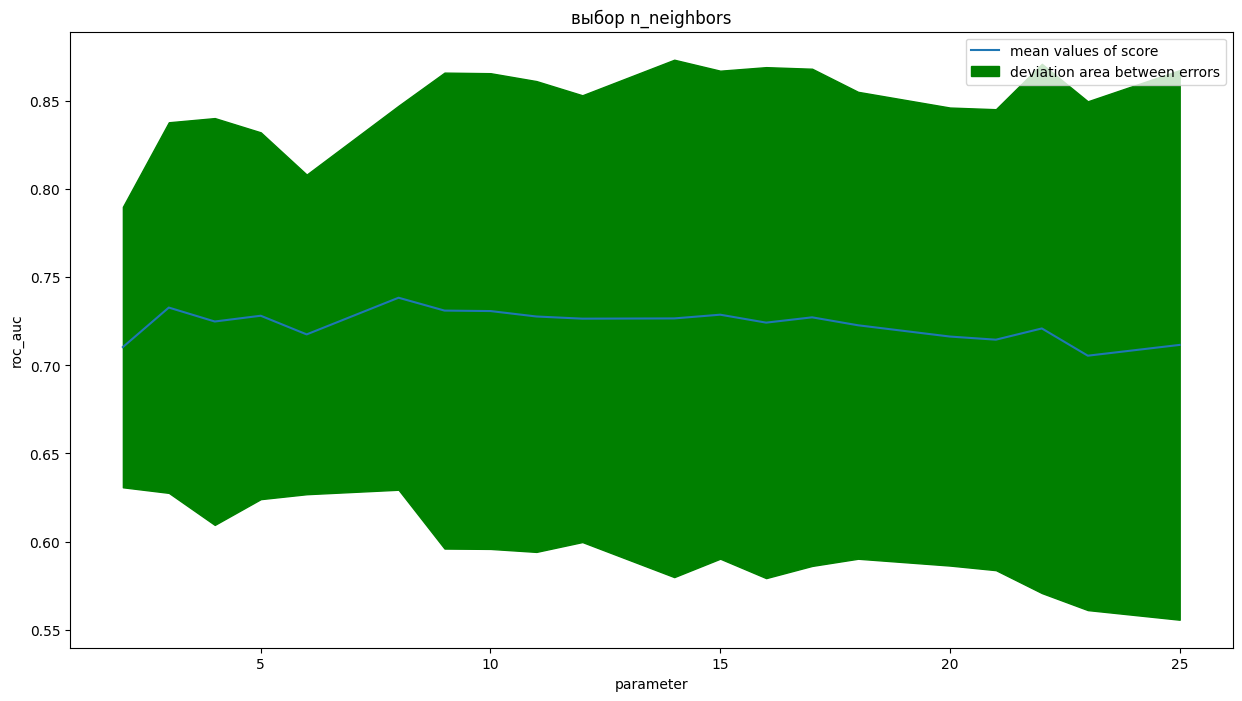

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
models = [KNeighborsClassifier(n_jobs=-1)]
param_names = ['n_neighbors']
grids = [np.array(np.linspace(2, 25, 20), dtype='int')]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
  search(X_train, y_train, model, param_name, grid, param_scale)

синий график показывает качество roc_auc в моделе К-соседей в зависимости от параметра "количество соседей"

зеленый "рукав" показывает дисперсию качества

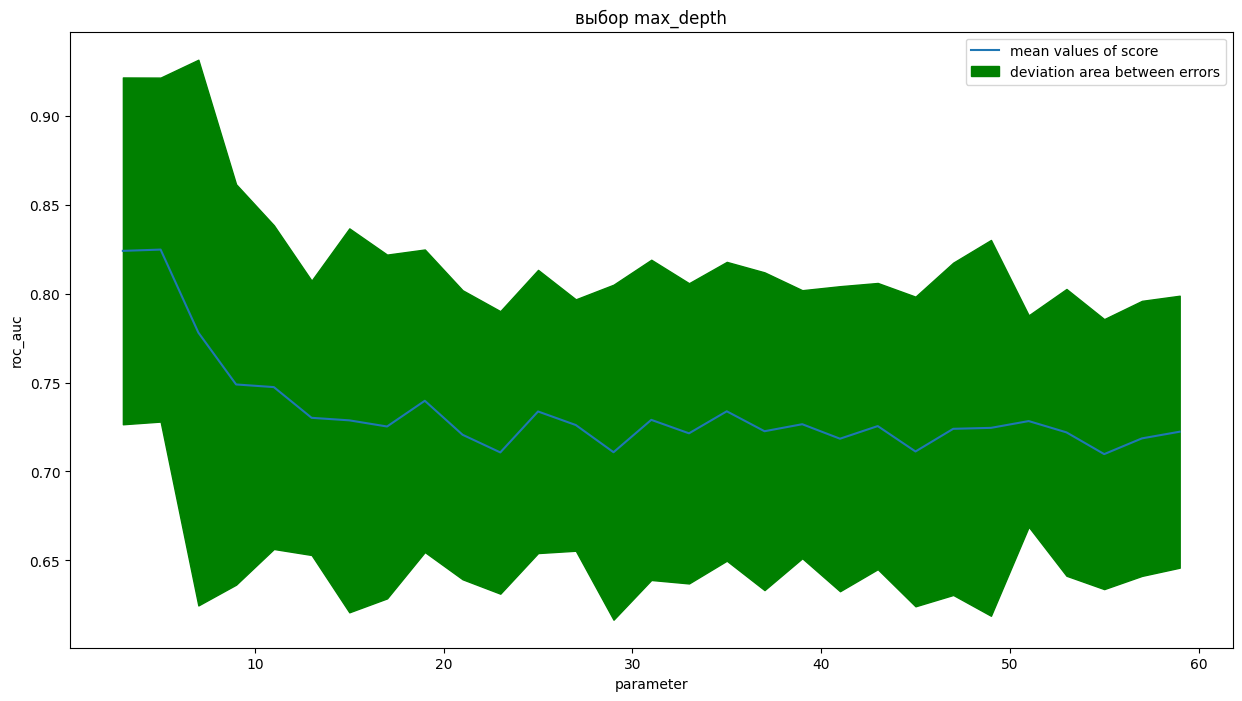

In [ ]:
from sklearn.tree import DecisionTreeClassifier
models = [DecisionTreeClassifier()]
param_names = ['max_depth']
grids = [np.arange(3,60,2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
  search(X_train, y_train, model, param_name, grid, param_scale)

Здесь снова синий график показывает качество roc_auc в моделе К-соседей в зависимости от параметра "количество соседей"

зеленый "рукав" показывает дисперсию качества

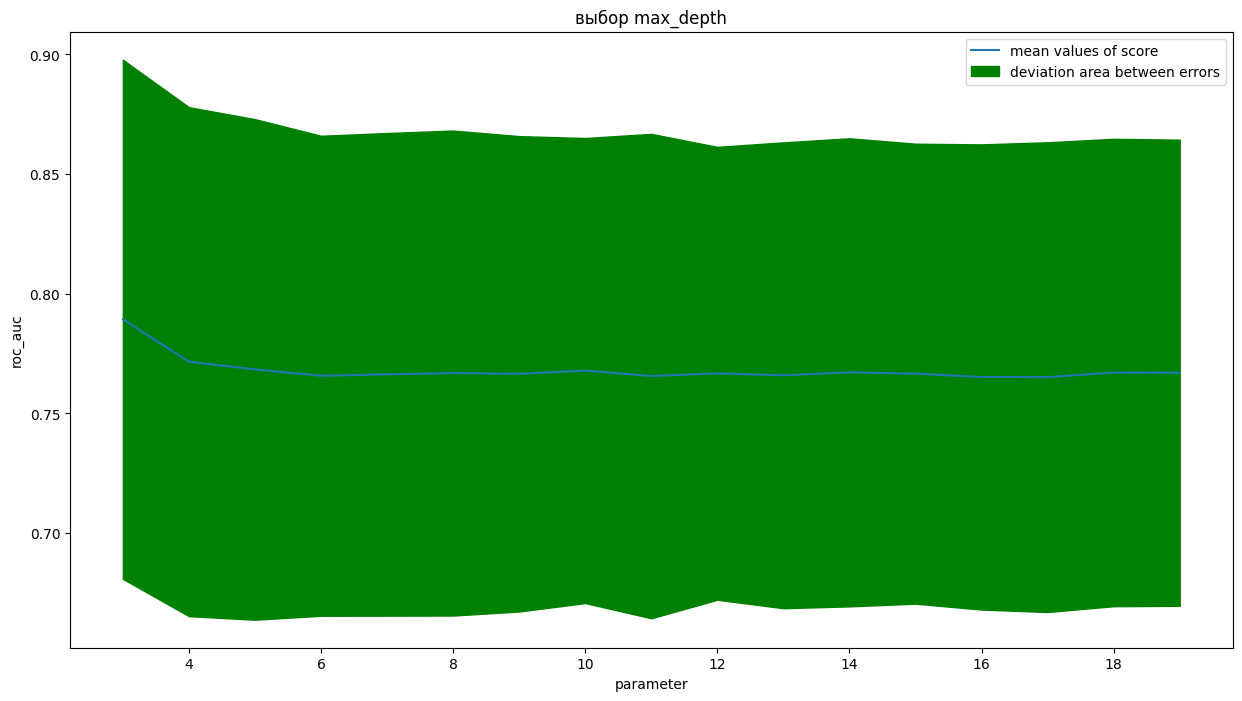

In [ ]:
import xgboost

models = [xgboost.XGBClassifier(n_estimators=1000)]
param_names=['max_depth']
grids = [np.arange(3,20,1)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
  search(X_train, y_train, model, param_name, grid, param_scale)

## Результаты моделирования

### Задание 8
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [ ]:
#используем модель градиентного бустинга XGboost так как она дала хорошие показатели при параметрах максимальной глубины 3
import xgboost
model = xgboost.XGBClassifier(n_estimators=1000, max_depth=3).fit(X_train, y_train)

result = cross_val_score(xgboost.XGBClassifier(n_estimators=1000, max_depth=3), X=X_train, y=y_train, cv=5)
result

array([0.752     , 0.824     , 0.744     , 0.75      , 0.84677419])

In [ ]:
print (f'Среднее МАЕ (обсалютное отклонение) равно {result.mean()}, стандартное отклонение МАЕ (дисперсия) равно {result.std()}')

Среднее МАЕ (обсалютное отклонение) равно 0.7833548387096775, стандартное отклонение МАЕ (дисперсия) равно 0.043170634024062494


In [ ]:
#использование модели на тестовом множестве X_test
model = xgboost.XGBClassifier(n_estimators=1000, max_depth=3).fit(X_test, y_test)
y_test = model.predict(X_test)
result = cross_val_score(xgboost.XGBClassifier(n_estimators=1000, max_depth=3), X=X_test, y=y_test, cv=5)
result

array([0.85185185, 0.81481481, 0.83333333, 0.73584906, 0.8490566 ])

In [ ]:
print (f'Среднее МАЕ (обсалютное отклонение) равно {result.mean()}, стандартное отклонение МАЕ (дисперсия) равно {result.std()}')

Среднее МАЕ (обсалютное отклонение) равно 0.23186354552935784, стандартное отклонение МАЕ (дисперсия) равно 0.08819436537334754


## Выводы
### Задание 9
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

 **Хоть мною и небыло достигнуты высокие показатели качества моделей, я изучил следующее:**
*   принципы подготовки данных к анализу
*   способы группировки и  визуализации данных для последующего сбора информации о зависимостях в них
*   различные алгоритмы машинного обучения
*   способ подбора оптимальных параметров для алгоритмов
*   технологии оценки качества модели

**Определенно сработала идея перекодирования категориальных признаков ohe-hote кодированием, так так это увеличило количество признаков дня обработки моделью, исключив строковые колонки таблицы.
Также не лишним было построение графиков зависимостей качества моделей от их параметров, это привело к оптимальным решениям проблемы**